In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import scipy
import sklearn
import xgboost
import imblearn
pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel

In [5]:
train.shape

(42000, 785)

In [6]:
test.shape

(28000, 784)

In [7]:
def sumna(x):
    return np.sum(x.isna())

train.apply(lambda x: sumna(x)).sum()

0

In [8]:
test.apply(lambda x: sumna(x)).sum()

0

### Sample of images

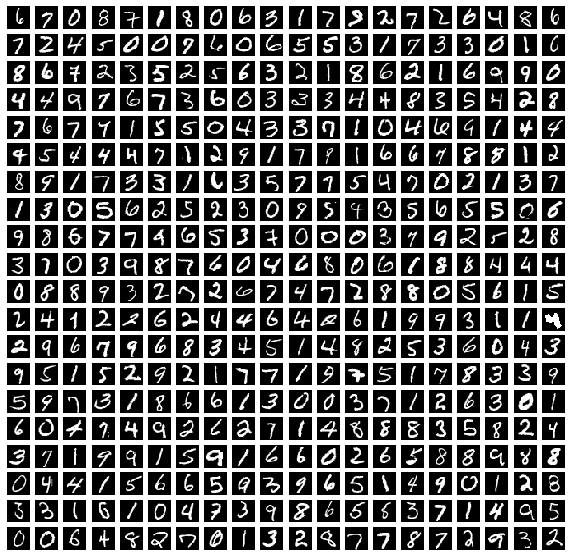

In [9]:
images = np.random.choice(train.shape[0], 400)
plt.figure(figsize = (10, 10))
for i in range(400):
    plt.subplot(20, 20, i + 1)
    plt.imshow(train.drop(columns = "label").iloc[images[i],:].values.reshape((28, 28)), cmap = "gray")
    plt.axis("off")

### Consideret dataset is balanced. Prove of this is shown on below barplot.

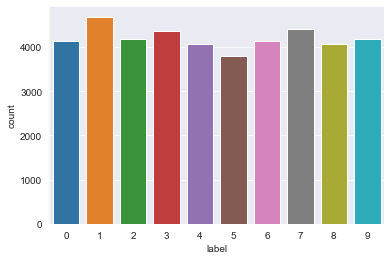

In [10]:
sns.countplot(x = train.label)

In [11]:
labels = train.groupby("label").agg(n = ("pixel0", "count")).reset_index()
labels["percentage"] = labels.n / train.shape[0]

labels.sort_values(by = "percentage", ascending = False)

,label,n,percentage
1,1,4684,0.111524
7,7,4401,0.104786
3,3,4351,0.103595
9,9,4188,0.099714
2,2,4177,0.099452
6,6,4137,0.098500
0,0,4132,0.098381
4,4,4072,0.096952
8,8,4063,0.096738
5,5,3795,0.090357


### Like we can see above train dataset is balanced so i don't have to use undersampling or oversampling methods to avoid bias of imbalanced dataset.

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, n_jobs = -1)

train_reduced = tsne.fit_transform(train.drop(columns = "label"))

In [13]:
train_reduced = pd.DataFrame(train_reduced)
train_reduced["label"] = train.label.astype("str")

[Text(0, 0.5, ''), Text(0.5, 0, '')]

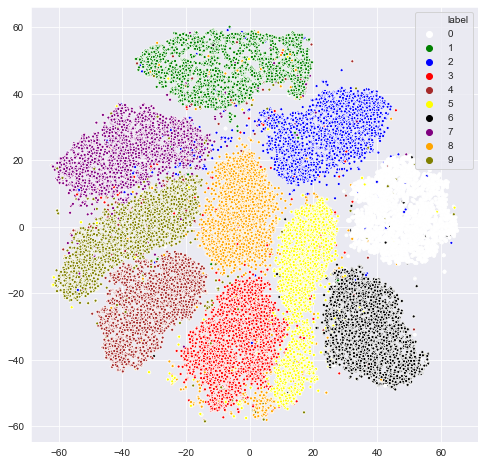

In [14]:
plt.figure(figsize = (8, 8))
sns.scatterplot(x = train_reduced.iloc[:,0], y = train_reduced.iloc[:,1], hue = train_reduced.label,
               palette = ["white", "green", "blue", "red", "brown", 
                          "yellow", "black", "purple", "orange", "olive"], marker = ".").set(
xlabel = None, ylabel = None)

### TSNE algorithm shows that this dataset is easy to classify. We can see on above plot that numbers are good separate from each other (with little noise). Only eight is splitted (some of them are near three).

In [15]:
from scipy.ndimage import shift

def shifting(df, drct = [0, 2]): # this function create shifted dataset according to declared directions
    new_df = shift(df.iloc[0,:].values.reshape((28, 28)), shift = drct, cval = 0).reshape((1, 784))
    n_rows = df.shape[0] - 1
    
    for i in np.arange(n_rows) + 1:
        x = shift(df.iloc[i,:].values.reshape((28, 28)), shift = drct, cval = 0).reshape((1, 784))
        new_df = np.append(new_df, x, axis = 0)
        
    return pd.DataFrame(new_df)

In [16]:
train_2_right = shifting(train.drop(columns = "label"), drct = [0, 2])
train_2_right.insert(0, "label", train.label)

train_2_left = shifting(train.drop(columns = "label"), drct = [0, -2])
train_2_left.insert(0, "label", train.label)

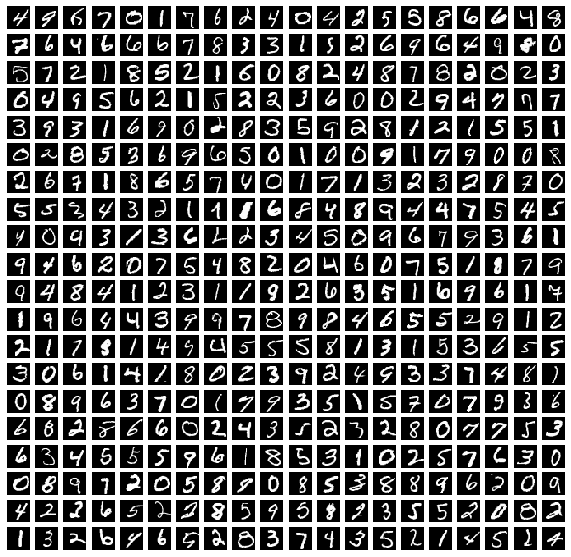

In [17]:
images = np.random.choice(train.shape[0], 400)
plt.figure(figsize = (10, 10))
for i in range(400):
    plt.subplot(20, 20, i + 1)
    plt.imshow(train_2_right.drop(columns = "label").iloc[images[i],:].values.reshape((28, 28)), cmap = "gray")
    plt.axis("off")

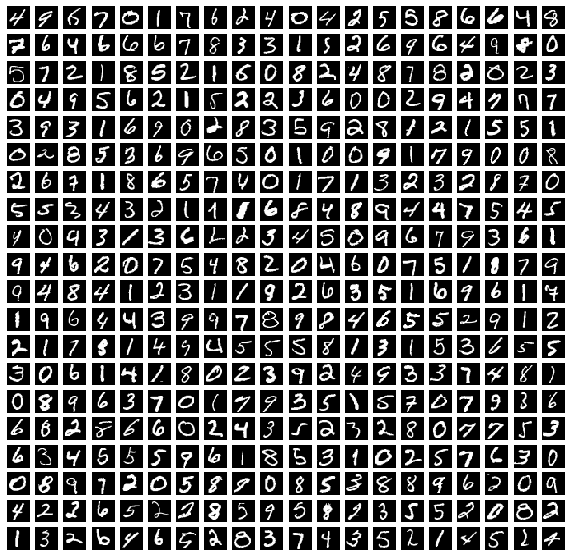

In [18]:
plt.figure(figsize = (10, 10))
for i in range(400):
    plt.subplot(20, 20, i + 1)
    plt.imshow(train_2_left.drop(columns = "label").iloc[images[i],:].values.reshape((28, 28)), cmap = "gray")
    plt.axis("off")

In [19]:
train_augment = pd.concat([train, train_2_right, train_2_left], axis = 0)

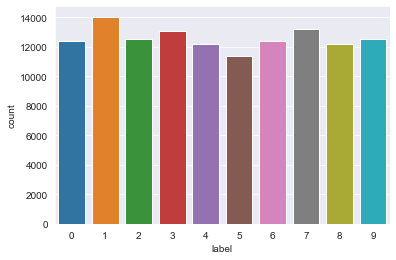

In [20]:
sns.countplot(x = train_augment.label)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop(columns = "label"), train.label,
                                                   test_size = 0.2, random_state = 42)

### Below are shown machine learning algorithms with test accuracy and confusion matrix

XGBClassifier score: 0.9741666666666666
     0    1    2    3    4    5    6    7    8    9
0  807    0    0    0    3    0    4    0    2    0
1    0  901    3    1    1    0    2    1    0    0
2    1    5  821    4    9    1    1    1    3    0
3    0    3    4  901    0   11    0    4    7    7
4    1    0    2    1  813    1    5    3    0   13
5    1    1    1    8    0  676    5    2    5    3
6    1    2    0    0    0    3  774    0    5    0
7    0    2    9    2    3    0    0  863    1   13
8    0    2    2    1    2    2    2    2  818    4
9    1    1    1    9    6    2    0    7    2  809


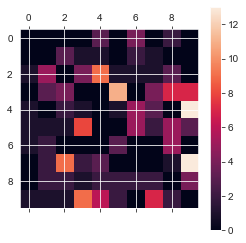

In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

xgb_clf = XGBClassifier(nthread = -1)
xgb_clf.fit(X_train, y_train)

y_test_pred = xgb_clf.predict(X_test)

print(xgb_clf.__class__.__name__, "score:", accuracy_score(y_test, y_test_pred))

conf_mx = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index = np.arange(0, 10), columns = np.arange(0, 10))
print(conf_mx)
np.fill_diagonal(conf_mx.values, 0)

plt.matshow(conf_mx)
plt.colorbar()

ExtraTreesClassifier score: 0.9664285714285714
     0    1    2    3    4    5    6    7    8    9
0  807    0    1    0    1    0    4    0    2    1
1    0  904    2    0    1    0    2    0    0    0
2    2    4  813    2    8    0    4    5    7    1
3    1    0    5  884    1   14    0   10   14    8
4    1    1    1    0  813    0    6    2    1   14
5    2    1    1    9    1  666   10    0    5    7
6    2    1    1    0    1    2  774    0    4    0
7    1    2   13    0    3    0    0  855    2   17
8    1    1    3   10    3    3    1    2  804    7
9    2    2    2   11    6    3    1    8    5  798


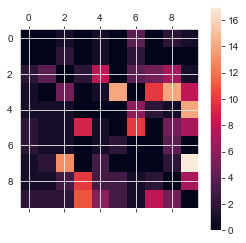

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

et_clf = ExtraTreesClassifier(n_jobs = -1)
et_clf.fit(X_train, y_train)

y_test_pred = et_clf.predict(X_test)

print(et_clf.__class__.__name__, "score:", accuracy_score(y_test, y_test_pred))


conf_mx = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index = np.arange(0, 10), columns = np.arange(0, 10))
print(conf_mx)
np.fill_diagonal(conf_mx.values, 0)

plt.matshow(conf_mx)
plt.colorbar()

RandomForestClassifier score: 0.9644047619047619
     0    1    2    3    4    5    6    7    8    9
0  803    0    2    1    1    0    6    0    2    1
1    0  898    4    2    1    1    1    1    0    1
2    2    4  814    2   10    1    4    4    5    0
3    0    1    5  890    1   12    0    8   10   10
4    1    0    1    0  813    0    5    2    1   16
5    2    0    2   10    0  667    8    1    6    6
6    3    1    1    0    1    1  773    0    5    0
7    1    2   10    2    5    1    0  851    2   19
8    1    2    2    9    4    4    3    2  799    9
9    2    4    3   10    8    4    0    9    5  793


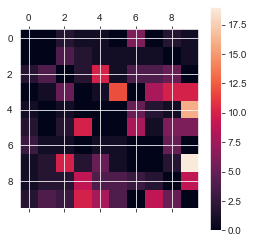

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(n_jobs = -1)
rf_clf.fit(X_train, y_train)

y_test_pred = rf_clf.predict(X_test)

print(rf_clf.__class__.__name__, "score:", accuracy_score(y_test, y_test_pred))


conf_mx = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index = np.arange(0, 10), columns = np.arange(0, 10))
print(conf_mx)
np.fill_diagonal(conf_mx.values, 0)

plt.matshow(conf_mx)
plt.colorbar()

SVC score: 0.973452380952381
     0    1    2    3    4    5    6    7    8    9
0  807    0    0    0    2    1    4    0    1    1
1    0  902    1    1    1    1    0    1    1    1
2    3    3  820    2    8    0    3    3    4    0
3    1    3    5  898    0    9    0    6   11    4
4    1    0    1    0  815    1    5    3    0   13
5    1    1    1    8    2  679    6    0    2    2
6    3    1    0    0    0    1  777    0    3    0
7    0    2    7    0    4    1    0  867    2   10
8    1    2    3    7    5    4    0    2  810    1
9    2    2    1   10   10    1    0    7    3  802


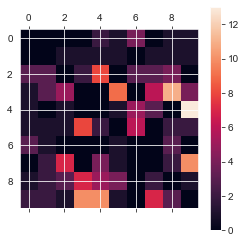

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_clf = SVC()
svc_clf.fit(X_train, y_train)

y_test_pred = svc_clf.predict(X_test)

print(svc_clf.__class__.__name__, "score:", accuracy_score(y_test, y_test_pred))


conf_mx = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index = np.arange(0, 10), columns = np.arange(0, 10))
print(conf_mx)
np.fill_diagonal(conf_mx.values, 0)

plt.matshow(conf_mx)
plt.colorbar()

KNeighborsClassifier score: 0.9666666666666667
     0    1    2    3    4    5    6    7    8    9
0  812    0    0    0    0    1    3    0    0    0
1    0  907    0    0    0    0    2    0    0    0
2    7   13  800    4    3    2    1   14    1    1
3    1    5    5  896    0    9    0    8    9    4
4    1    3    0    0  816    0    3    1    0   15
5    0    0    0    7    1  678    8    0    3    5
6    6    0    0    0    0    3  776    0    0    0
7    0   14    4    0    1    0    0  863    0   11
8    3   11    6   11    2   16    3    2  774    7
9    2    2    2    9    9    2    0   14    0  798


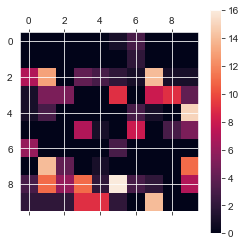

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

kn_clf = KNeighborsClassifier(n_neighbors = 3, n_jobs = -1)
kn_clf.fit(X_train, y_train)

y_test_pred = kn_clf.predict(X_test)

print(kn_clf.__class__.__name__, "score:", accuracy_score(y_test, y_test_pred))


conf_mx = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index = np.arange(0, 10), columns = np.arange(0, 10))
print(conf_mx)
np.fill_diagonal(conf_mx.values, 0)

plt.matshow(conf_mx)
plt.colorbar()

### We can see that above algorithms make different mistakes. Below I combine them and use hard voting approach to improve classification abilities. In scikit-learn it is under VotingClassifier but here I use function to avoid retraining because of saving time.

Voting classifier score: 0.9772619047619048
     0    1    2    3    4    5    6    7    8    9
0  809    0    0    0    2    0    4    0    1    0
1    0  904    1    1    1    0    1    1    0    0
2    3    5  825    3    7    0    1    1    1    0
3    1    4    6  902    0    8    0    5    5    6
4    1    0    1    1  817    1    4    3    0   11
5    1    1    1    7    2  680    7    0    0    3
6    2    1    0    0    0    2  777    0    3    0
7    0    4    7    0    3    0    0  870    1    8
8    1    2    3    2    4    4    0    1  815    3
9    2    2    2    9    5    1    0    6    1  810


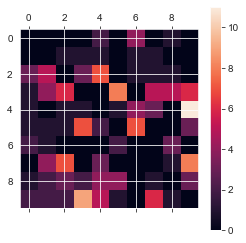

In [76]:
def voting(df):
    xgb_pred = xgb_clf.predict(df)
    et_pred = et_clf.predict(df)
    rf_pred = rf_clf.predict(df)
    svc_pred = svc_clf.predict(df)
    kn_pred = kn_clf.predict(df)
    
    return scipy.stats.mode(np.array([xgb_pred, svc_pred, kn_pred]))[0].reshape(df.shape[0],)
    
y_test_pred = voting(X_test)

print("Voting classifier score:", accuracy_score(y_test, y_test_pred))

conf_mx = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index = np.arange(0, 10), columns = np.arange(0, 10))
print(conf_mx)
np.fill_diagonal(conf_mx.values, 0)

plt.matshow(conf_mx)
plt.colorbar()

### Combining single algorithms into ensemble give better result. Now I retrain the models on whole train dataset and make classification on kaggle test dataset.

In [78]:
xgb_clf.fit(train.drop(columns = "label"), train.label)
et_clf.fit(train.drop(columns = "label"), train.label)
rf_clf.fit(train.drop(columns = "label"), train.label)
svc_clf.fit(train.drop(columns = "label"), train.label)
kn_clf.fit(train.drop(columns = "label"), train.label)

test_pred = voting(test)

In [81]:
digit_submission = (pd.concat([pd.Series(range(test.shape[0]), name = "ImageId") + 1, 
            pd.Series(test_pred, name = "Label")], axis = 1).set_index("ImageId"))

digit_submission

,Label
ImageId,
1,2
2,0
3,9
4,9
5,3
...,...
27996,9
27997,7
27998,3


In [82]:
digit_submission.to_csv("digit_submission_ml.csv")